### From original data merge to gefs_merged with Spyder
gefs-merge-two-files-precip.py

In [2]:
import xarray as xr

In [2]:
# Not used
path = 'data/'
gefs_file = 'gefs/WCUS/gefs_merged_shifted.nc'
pr_gefs = xr.open_dataset(path + gefs_file)

In [3]:
pr_gefs

<xarray.Dataset>
Dimensions:              (fhour: 14, lat: 49, lon: 45, time: 12935)
Coordinates:
  * fhour                (fhour) timedelta64[ns] 0 days 12:00:00 ... 13 days 12:00:00
  * lat                  (lat) float32 14.0 15.0 16.0 17.0 ... 60.0 61.0 62.0
  * lon                  (lon) float32 219.0 220.0 221.0 ... 261.0 262.0 263.0
  * time                 (time) datetime64[ns] 1984-12-01 ... 2020-04-30
Data variables:
    Total_precipitation  (time, fhour, lat, lon) float32 ...

In [8]:
path = 'data/'
gefs_file = 'gefs/NCA/gefs_merged.nc'
pr_gefs_nca = xr.open_dataset(path + gefs_file)

In [9]:
pr_gefs_nca

<xarray.Dataset>
Dimensions:              (fhour: 14, time: 12935)
Coordinates:
  * fhour                (fhour) timedelta64[ns] 0 days 06:00:00 ... 13 days 06:00:00
  * time                 (time) datetime64[ns] 1984-12-01 ... 2020-04-30
Data variables:
    Total_precipitation  (time, fhour) float32 ...

In [10]:
path = 'data/'
gefs_file = 'gefs/WCUS/gefs_merged.nc'
pr_gefs_og = xr.open_dataset(path + gefs_file)

In [11]:
pr_gefs_og

<xarray.Dataset>
Dimensions:              (fhour: 14, lat: 49, lon: 45, time: 12935)
Coordinates:
  * fhour                (fhour) timedelta64[ns] 0 days 06:00:00 ... 13 days 06:00:00
  * lat                  (lat) float32 14.0 15.0 16.0 17.0 ... 60.0 61.0 62.0
  * lon                  (lon) float32 219.0 220.0 221.0 ... 261.0 262.0 263.0
  * time                 (time) datetime64[ns] 1984-12-01 ... 2020-04-30
Data variables:
    Total_precipitation  (time, fhour, lat, lon) float32 ...

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import cartopy
import cartopy.crs as ccrs
import numpy as np

In [14]:
pr_gefs_og.sel(fhour=pr_gefs_og.fhour[0]).sel(time=pr_gefs_og.time)

<xarray.Dataset>
Dimensions:              (lat: 49, lon: 45, time: 12935)
Coordinates:
    fhour                timedelta64[ns] 06:00:00
  * lat                  (lat) float32 14.0 15.0 16.0 17.0 ... 60.0 61.0 62.0
  * lon                  (lon) float32 219.0 220.0 221.0 ... 261.0 262.0 263.0
  * time                 (time) datetime64[ns] 1984-12-01 ... 2020-04-30
Data variables:
    Total_precipitation  (time, lat, lon) float32 ...

### Take a look at ERA5

In [8]:
path = 'data/'
ds_target = xr.open_dataset(path + 'era5_daily_target_precip_NCA.nc')
ds_target = ds_target.sel(time=slice('1985-01-01', '2019-12-31'))
y = ds_target.tp.values.astype(float) # precip values shape=(time,)=（12783,）
y = y[~np.isnan(y)] # removed nan from y so that shape=(5293,)
np.quantile(y, 0.90)
np.quantile(y, 0.95)

# unit here is cm

2.0846939563751214

In [11]:
y.shape

(5293,)

In [16]:
0.08*1361

108.88

In [15]:
0.05*1361

68.05

In [10]:
np.quantile(y, 0.92)


1.5955857896804815

### Take a look at GEFS NCA

In [52]:
def is_NDJFM(month):
  return (month >= 11) | (month <= 3)

def time_mask(ds):
  return (is_NDJFM(ds['time.month']) & 
         (ds['time.year'] >= 1985) & # whole period. test is 2011.
         (ds['time.year'] <= 2019)) 


path = '/data/'
gefs_nca = 'gefs/NCA/gefs_merged.nc'
pr_gefs = xr.open_dataset(path + gefs_nca).Total_precipitation
pr_gefs = xr.concat([pr_gefs.sel(fhour=hour).shift(time=i) for i,hour in enumerate(pr_gefs.fhour)],'fhour')
pr_gefs = pr_gefs.sel(time=time_mask(pr_gefs))

In [68]:
pr_gefs_test=pr_gefs.sel(time=slice('2011-01-01','2019-12-31'))
pr_gefs_train=pr_gefs.sel(time=slice('1985-01-01','2010-12-31'))

In [69]:
pr_gefs_train

<xarray.DataArray 'Total_precipitation' (fhour: 14, time: 3932)>
array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.52624989e+00, 1.85429692e-01, 1.58984382e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.33851576e+00, 1.16738282e-01, 4.60156277e-02],
       [0.00000000e+00, 0.00000000e+00, 5.07812481e-04, ...,
        2.20568371e+00, 8.51757750e-02, 4.28125001e-02],
       ...,
       [3.72705072e-01, 1.04667962e-01, 2.67578149e-03, ...,
        4.61005867e-01, 6.46386683e-01, 5.50371170e-01],
       [2.85107434e-01, 3.99765611e-01, 1.10410154e-01, ...,
        4.96093750e-01, 9.90654349e-01, 2.08417982e-01],
       [3.17656279e-01, 3.11083972e-01, 2.51845688e-01, ...,
        1.03261721e+00, 3.40810537e-01, 1.24835944e+00]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1985-01-01 1985-01-02 ... 2010-12-31
  * fhour    (fhour) timedelta64[ns] 0 days 06:00:00 ... 13 days 06:00:00

In [70]:
leads = [d for d in range(14)]
quantiles = [0.50, 0.75, 0.80, 0.85, 0.9, 0.95]

df_bm_train_q = pd.DataFrame()
df_bm_test_q = pd.DataFrame()

quantiles = [0.50, 0.75, 0.80, 0.85, 0.9, 0.95]
leads = [d for d in range(14)]
for quantile in quantiles:
    x_train_q = []
    x_test_q = []
    for l in leads:
        fhours = pr_gefs.fhour[l]
        x_train_q.append(np.quantile(pr_gefs_train.sel(fhour=fhours).values, quantile))
        x_test_q.append(np.quantile(pr_gefs_test.sel(fhour=fhours).values, quantile))
    df_bm_train_q['%s' % quantile] = x_train_q
    df_bm_test_q['%s' % quantile] = x_test_q

In [74]:
import seaborn as sns

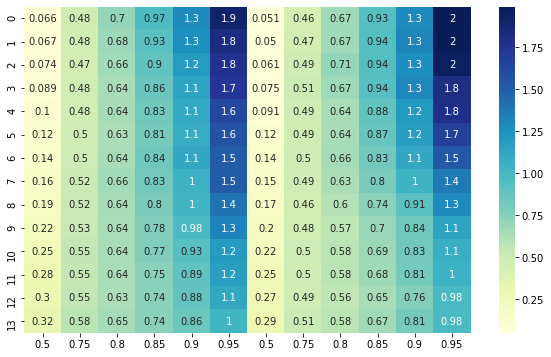

In [84]:
plt.rcParams['figure.figsize'] = [10, 6]
sns.heatmap(pd.concat([df_bm_train_q,df_bm_test_q], axis=1), annot=True, cmap='YlGnBu')
plt.show()

### From gefs_merged to tensor
to_tensor1d.py

output: gefs_mos_daily_tensor_precip.pkl

In [28]:
import pickle
import numpy as np

In [45]:
fname = 'data/tensor/gefs_mos_daily_tensor_precip_nonstd.pkl'
x_train_2d, y_train_2d, x_test_2d, y_test_2d = pickle.load(open(fname, 'rb'))

In [46]:
x_train_2d.shape

(3932, 49, 45, 1, 14)

In [47]:
x_test_2d.shape

(1361, 49, 45, 1, 14)

In [48]:
quantiles = [0.50, 0.75, 0.80, 0.85, 0.9, 0.95]

for q in quantiles:
    print('quantile:', q)
    print('train_quantile: %0.6f test_quantile: %0.6f' % (np.quantile(y_train_2d, q), np.quantile(y_test_2d, q)))

quantile: 0.5
train_quantile: 0.042820 test_quantile: 0.028588
quantile: 0.75
train_quantile: 0.480943 test_quantile: 0.405145
quantile: 0.8
train_quantile: 0.665847 test_quantile: 0.674323
quantile: 0.85
train_quantile: 0.978901 test_quantile: 0.950566
quantile: 0.9
train_quantile: 1.369561 test_quantile: 1.424321
quantile: 0.95
train_quantile: 2.023522 test_quantile: 2.216852


In [49]:
df_x_train_q = pd.DataFrame()
df_x_test_q = pd.DataFrame()

quantiles = [0.50, 0.75, 0.80, 0.85, 0.9, 0.95]
leads = [d for d in range(14)]
for quantile in quantiles:
    x_train_q = []
    x_test_q = []
    for l in leads:
        x_train_q.append(np.quantile(x_train_2d[:,:,:,:,l],quantile))
        x_test_q.append(np.quantile(x_test_2d[:,:,:,:,l],quantile))
    df_x_train_q['%s' % quantile] = x_train_q
    df_x_test_q['%s' % quantile] = x_test_q

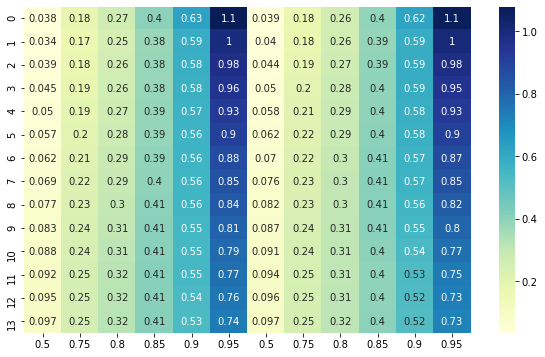

In [85]:
plt.rcParams['figure.figsize'] = [10, 6]
sns.heatmap(pd.concat([df_x_train_q,df_x_test_q], axis=1), annot=True, cmap='YlGnBu')
plt.show()

### DL experiment with tensor

In [1]:
!conda list tensorflow

# packages in environment at C:\Users\Cheryl\anaconda3\envs\tf:
#
# Name                    Version                   Build  Channel
tensorflow                2.3.0           mkl_py37h04bc1aa_0  
tensorflow-base           2.3.0           eigen_py37h17acbac_0  
tensorflow-estimator      2.3.0              pyheb71bc4_0  


In [2]:
!conda list keras

# packages in environment at C:\Users\Cheryl\anaconda3\envs\tf:
#
# Name                    Version                   Build  Channel
keras                     2.4.3                         0  
keras-applications        1.0.8                      py_1  
keras-base                2.4.3                      py_0  
keras-preprocessing       1.1.2              pyhd3eb1b0_0  
keras-vis                 0.4.1                    pypi_0    pypi


In [10]:
# single run from local

%run cnn-streamflow-forecast/keras/run_local.py

CNN 0.9 100 0.4 batch size 32
before oversampling (3932, 49, 45, 1) (3932,)
class weight {0: 0.5545839210155148, 1: 0.5}
after oversampling (7090, 49, 45, 1) (7090,)
Quantile: 0.90
 lead: 0
 model: CNN
Training set: ~50.00%
Test set: ~10.51%
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 47, 43, 256)       7168      
_________________________________________________________________
batch_normalization (BatchNo (None, 47, 43, 256)       1024      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 21, 256)       0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 21, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 19, 64)        147520    
____________

Epoch 18/100
7090/7090 [==============================] - ETA: 0s - loss: 0.0322 - f1_m: 0.9884
Epoch 00018: val_f1_m did not improve from 0.89290
7090/7090 [==============================] - 160s 23ms/sample - loss: 0.0322 - f1_m: 0.9884 - val_loss: 0.0952 - val_f1_m: 0.7595
Epoch 19/100
7090/7090 [==============================] - ETA: 0s - loss: 0.0272 - f1_m: 0.9909
Epoch 00019: val_f1_m did not improve from 0.89290
7090/7090 [==============================] - 162s 23ms/sample - loss: 0.0272 - f1_m: 0.9909 - val_loss: 0.1193 - val_f1_m: 0.8308
Epoch 20/100
7090/7090 [==============================] - ETA: 0s - loss: 0.0280 - f1_m: 0.9889
Epoch 00020: val_f1_m did not improve from 0.89290
7090/7090 [==============================] - 161s 23ms/sample - loss: 0.0280 - f1_m: 0.9889 - val_loss: 0.1154 - val_f1_m: 0.7982
Epoch 21/100
7090/7090 [==============================] - ETA: 0s - loss: 0.0231 - f1_m: 0.9919
Epoch 00021: val_f1_m did not improve from 0.89290
7090/7090 [===========

KeyboardInterrupt: 

In [ ]:
# single run on hpc1
# job id 5291613

In [ ]:
# entire run on hpc1
# job id 

### Create_outcome_matrix.py
output: classifier_outcomes_precip_v2.csv

In [27]:
%run cnn-streamflow-forecast/analyze/create_outcome_matrix.py

# 运行的时候报错 TypeError: __init__() got an unexpected keyword argument 'ragged'
# 所以将 from keras.models import load_model
# 换成：
# from tensorflow.keras.models import load_model

# 运行的时候继续报错 AttributeError: 'str' object has no attribute 'decode'
# downgrade h5py package to version 2.10.0

# 还是报错
# TypeError: ('Keyword argument not understood:', 'groups')
# 怀疑是hpc1 和 电脑上 tensorflow版本不同导致的

CNN_0_0.50


ValueError: name for name_scope must be a string.

### Create_benchmark_matrix.py
output: benchmark_matrix_precip_apples.csv

How many columns does the benchmark outcome have?

'ERA5'           1 column for true precip

'GEFS_VAL_%d'    14 columns for NCA precip mean at different lead time

'ERA5_%0.2f'     6 columns for true precip binary under different quantile

'GEFS_%d_%0.2f'  14 * 6 columns for NCA precip binary at lead & quantile

In [1]:
!conda list h5py

# packages in environment at C:\Users\Cheryl\anaconda3\envs\tf:
#
# Name                    Version                   Build  Channel
h5py                      2.10.0          nompi_py37he280515_106    conda-forge


In [2]:
!conda list tensorflow

# packages in environment at C:\Users\Cheryl\anaconda3\envs\tf:
#
# Name                    Version                   Build  Channel
tensorflow                2.1.0           eigen_py37hd727fc0_0  
tensorflow-base           2.1.0           eigen_py37h49b2757_0  
tensorflow-estimator      2.1.0              pyhd54b08b_0  


### EVAL with F1-score image

In [8]:
%run cnn-streamflow-forecast/analyze/create_outcome_matrix_location.py

CNN_0_0.50
MLP_0_0.50
CNN_1_0.50
MLP_1_0.50
CNN_2_0.50
MLP_2_0.50
CNN_3_0.50
MLP_3_0.50
CNN_4_0.50
MLP_4_0.50
CNN_5_0.50
MLP_5_0.50
CNN_6_0.50
MLP_6_0.50
CNN_7_0.50
MLP_7_0.50
CNN_8_0.50
MLP_8_0.50
CNN_9_0.50
MLP_9_0.50
CNN_10_0.50
MLP_10_0.50
CNN_11_0.50
MLP_11_0.50
CNN_12_0.50
MLP_12_0.50
CNN_13_0.50
MLP_13_0.50
CNN_0_0.75
MLP_0_0.75
CNN_1_0.75
MLP_1_0.75
CNN_2_0.75
MLP_2_0.75
CNN_3_0.75
MLP_3_0.75
CNN_4_0.75
MLP_4_0.75
CNN_5_0.75
MLP_5_0.75
CNN_6_0.75
MLP_6_0.75
CNN_7_0.75
MLP_7_0.75
CNN_8_0.75
MLP_8_0.75
CNN_9_0.75
MLP_9_0.75
CNN_10_0.75
MLP_10_0.75
CNN_11_0.75
MLP_11_0.75
CNN_12_0.75
MLP_12_0.75
CNN_13_0.75
MLP_13_0.75
CNN_0_0.80
MLP_0_0.80
CNN_1_0.80
MLP_1_0.80
CNN_2_0.80
MLP_2_0.80
CNN_3_0.80
MLP_3_0.80
CNN_4_0.80
MLP_4_0.80
CNN_5_0.80
MLP_5_0.80
CNN_6_0.80
MLP_6_0.80
CNN_7_0.80
MLP_7_0.80
CNN_8_0.80
MLP_8_0.80
CNN_9_0.80
MLP_9_0.80
CNN_10_0.80
MLP_10_0.80
CNN_11_0.80
MLP_11_0.80
CNN_12_0.80
MLP_12_0.80
CNN_13_0.80
MLP_13_0.80
CNN_0_0.85
MLP_0_0.85
CNN_1_0.85
MLP_1_0.85
CNN_2_0.

ValueError: in user code:

    C:\Users\Cheryl\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:1462 predict_function  *
        return step_function(self, iterator)
    C:\Users\Cheryl\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Cheryl\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Cheryl\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Cheryl\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Cheryl\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:1445 run_step  **
        outputs = model.predict_step(data)
    C:\Users\Cheryl\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:1418 predict_step
        return self(x, training=False)
    C:\Users\Cheryl\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\Cheryl\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:372 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    C:\Users\Cheryl\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\functional.py:386 call
        inputs, training=training, mask=mask)
    C:\Users\Cheryl\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\functional.py:508 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\Users\Cheryl\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\base_layer.py:976 __call__
        self.name)
    C:\Users\Cheryl\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\input_spec.py:216 assert_input_compatibility
        ' but received input with shape ' + str(shape))

    ValueError: Input 0 of layer dense_13 is incompatible with the layer: expected axis -1 of input shape to have value 2205 but received input with shape [None, 6615]


In [1]:
%run cnn-streamflow-forecast/analyze/create_outcome_matrix_location_center.py

CNN_0_0.50
MLP_0_0.50
CNN_1_0.50
MLP_1_0.50
CNN_2_0.50
MLP_2_0.50
CNN_3_0.50
MLP_3_0.50
CNN_4_0.50
MLP_4_0.50
CNN_5_0.50
MLP_5_0.50
CNN_6_0.50
MLP_6_0.50
CNN_7_0.50
MLP_7_0.50
CNN_8_0.50
MLP_8_0.50
CNN_9_0.50
MLP_9_0.50
CNN_10_0.50
MLP_10_0.50
CNN_11_0.50
MLP_11_0.50
CNN_12_0.50
MLP_12_0.50
CNN_13_0.50
MLP_13_0.50
CNN_0_0.75
MLP_0_0.75
CNN_1_0.75
MLP_1_0.75
CNN_2_0.75
MLP_2_0.75
CNN_3_0.75
MLP_3_0.75
CNN_4_0.75
MLP_4_0.75
CNN_5_0.75
MLP_5_0.75
CNN_6_0.75
MLP_6_0.75
CNN_7_0.75
MLP_7_0.75
CNN_8_0.75
MLP_8_0.75
CNN_9_0.75
MLP_9_0.75
CNN_10_0.75
MLP_10_0.75
CNN_11_0.75
MLP_11_0.75
CNN_12_0.75
MLP_12_0.75
CNN_13_0.75
MLP_13_0.75
CNN_0_0.90
MLP_0_0.90
CNN_1_0.90
MLP_1_0.90
CNN_2_0.90
MLP_2_0.90
CNN_3_0.90
MLP_3_0.90
CNN_4_0.90
MLP_4_0.90
CNN_5_0.90
MLP_5_0.90
CNN_6_0.90
MLP_6_0.90
CNN_7_0.90
MLP_7_0.90
CNN_8_0.90
MLP_8_0.90
CNN_9_0.90
MLP_9_0.90
CNN_10_0.90
MLP_10_0.90
CNN_11_0.90
MLP_11_0.90
CNN_12_0.90
MLP_12_0.90
CNN_13_0.90
MLP_13_0.90
CNN_0_0.95
MLP_0_0.95
CNN_1_0.95
MLP_1_0.95
CNN_2_0.

In [5]:
create_f1('precip_v2')

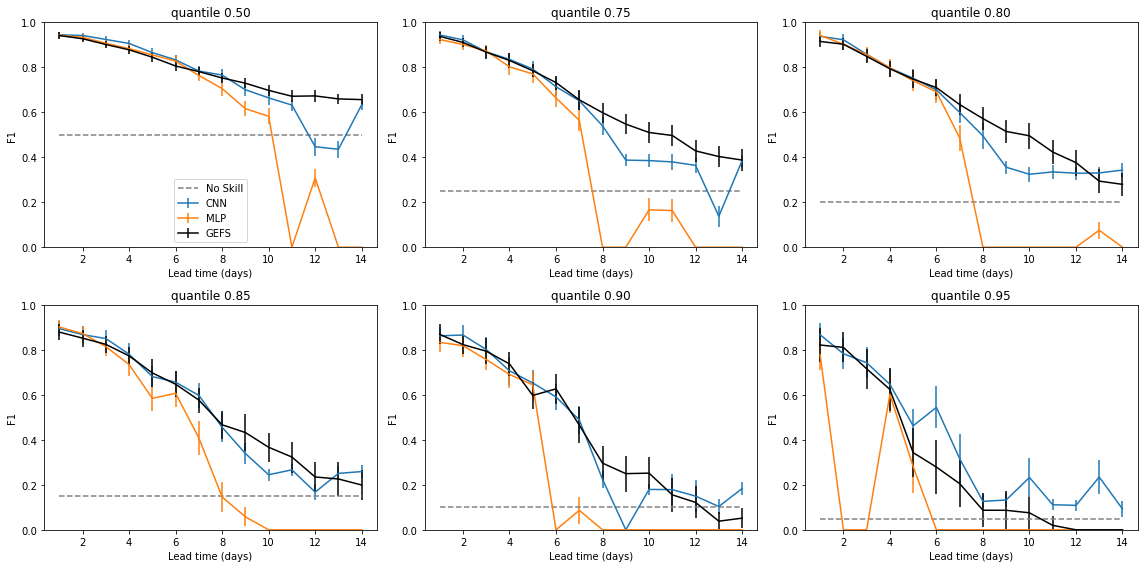

In [6]:
# ! Don't rerun!!!
plot_f1('precip_v2')
# 没有oversample,没有standardize,locally generated

In [7]:
create_f1('precip_v2')

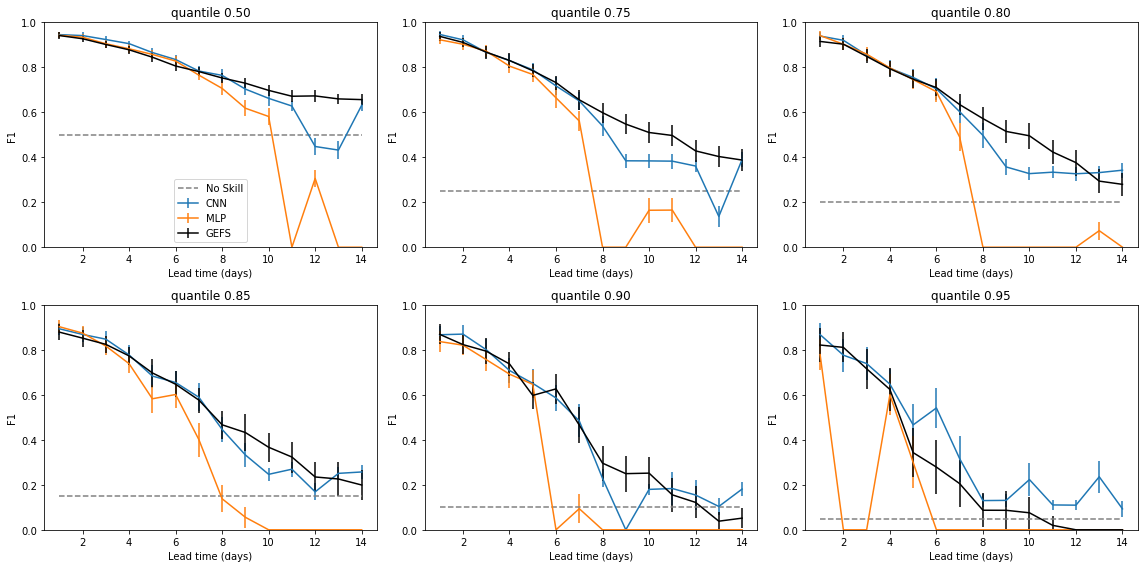

In [8]:
plot_f1('precip_v2')
# 没有oversample,没有standardize,csv generated on the cluster
# 看来我的model structure还是有一些问题

In [9]:
create_f1('precip_v3')

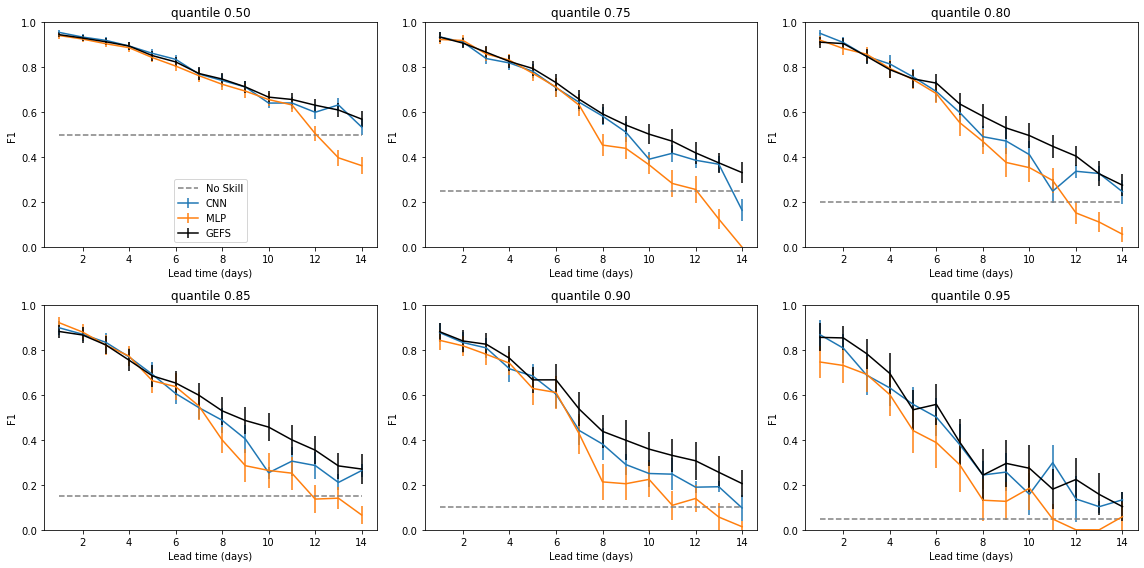

In [12]:
#不好看
plot_f1('precip_v3')

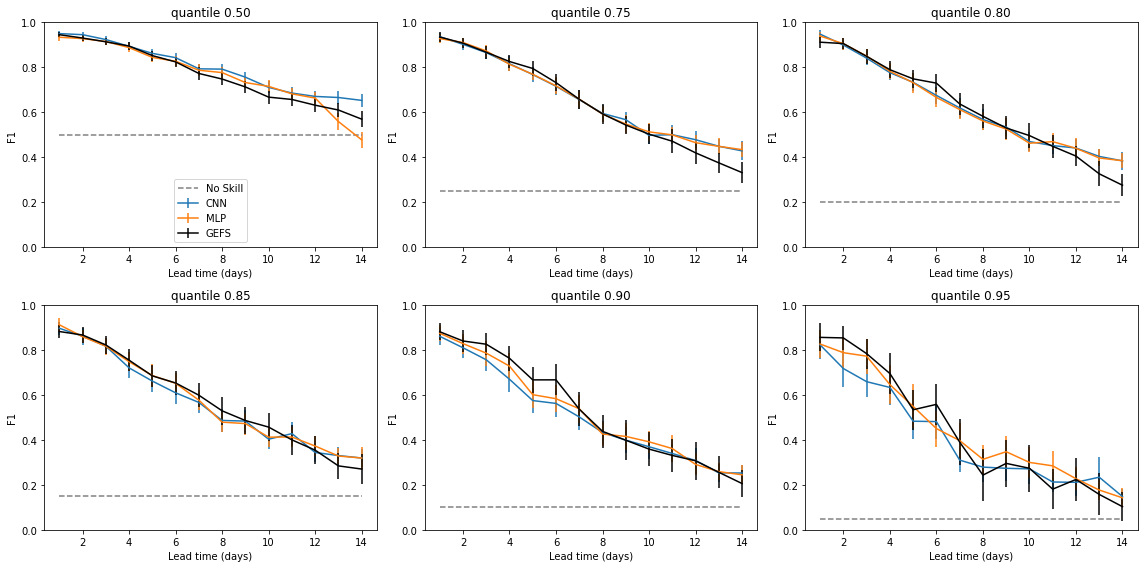

In [13]:
plot_f1('precip_newm')

In [14]:
create_f1('precip_v4')

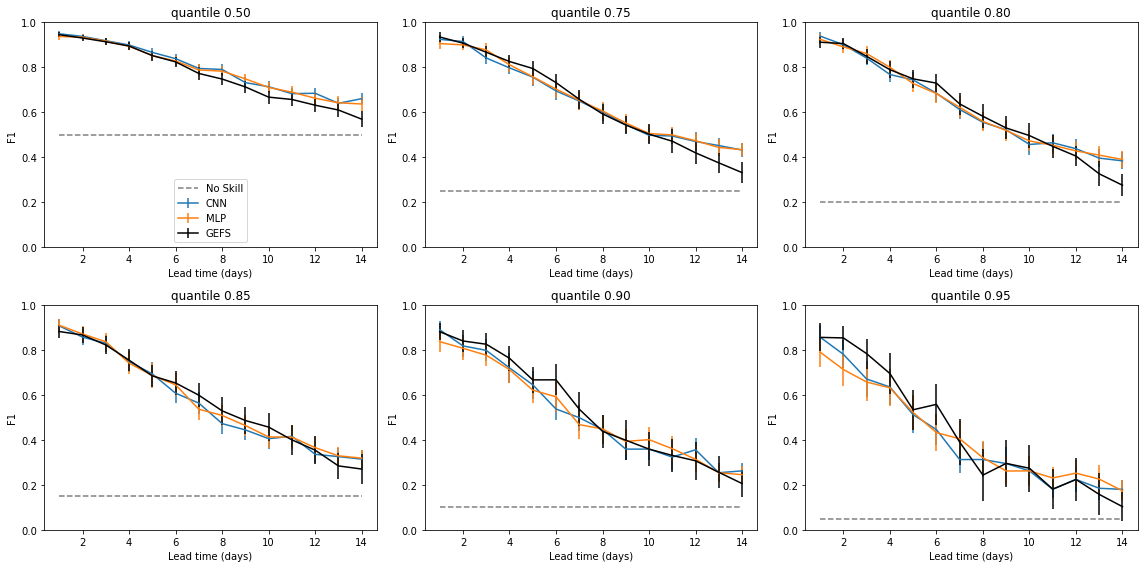

In [15]:
plot_f1('precip_v4')

In [18]:
create_f1('precip_location_std')

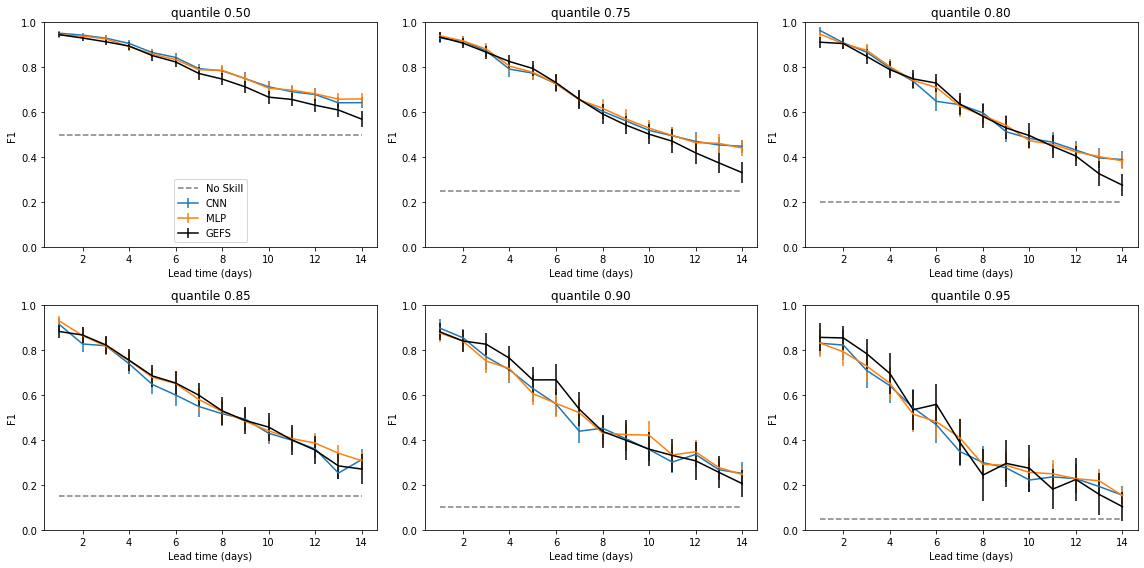

In [19]:
plot_f1('precip_location_std')

In [6]:
create_f1('precip_location_std2')

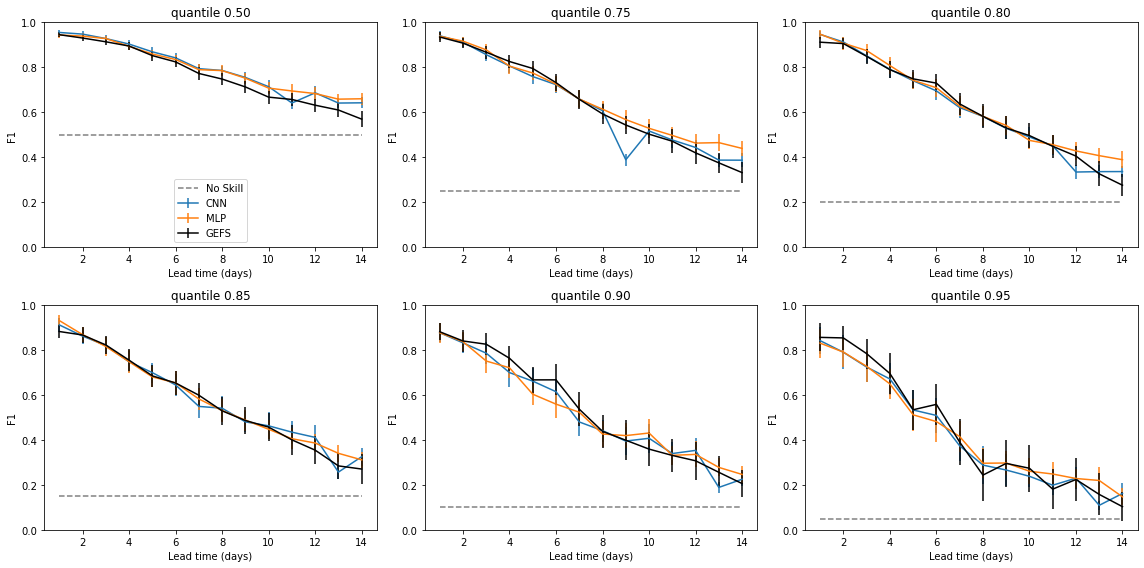

In [7]:
plot_f1('precip_location_std2')

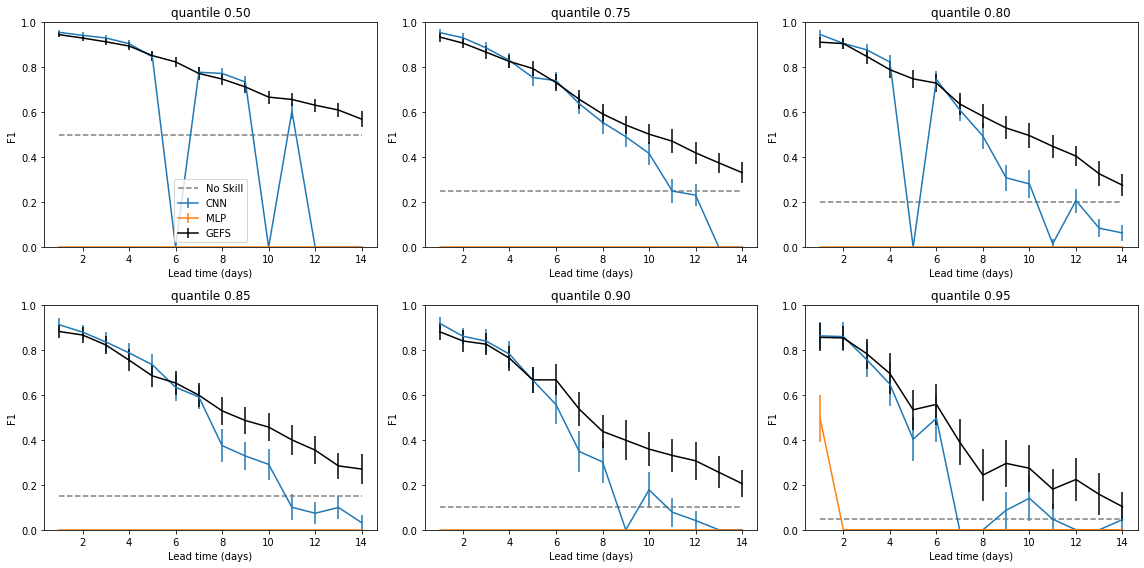

In [17]:
#非常不好看 隐藏了
plot_f1('precip_location')

In [6]:
create_f1('precip_location_nonstd3') #注意之前都写错了， 明明用的都是nonstd

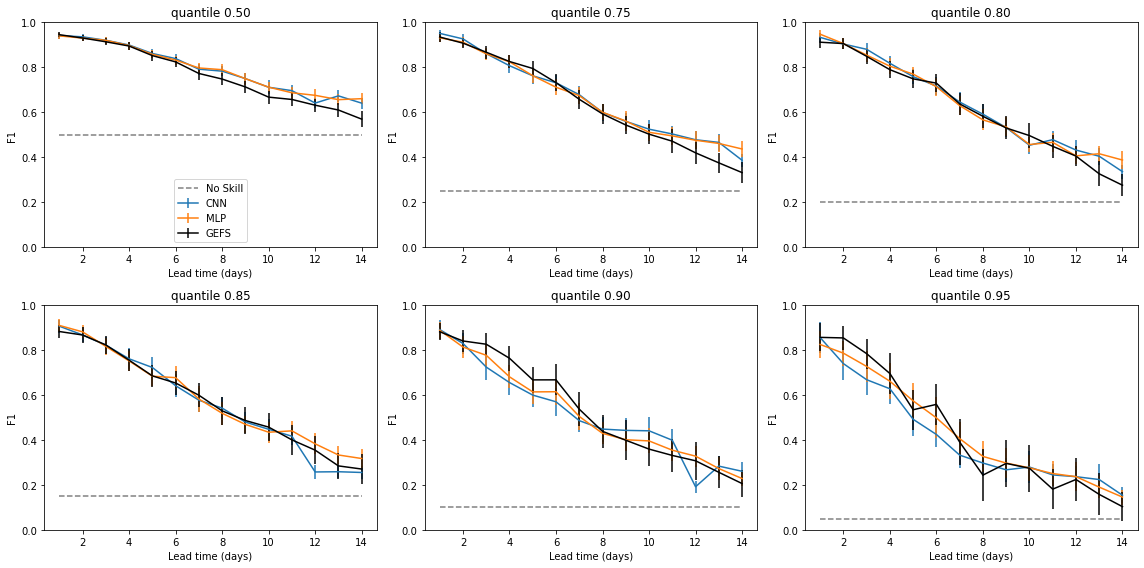

In [7]:
plot_f1('precip_location_nonstd3') 

In [9]:
# create_f1('precip_location_nonstd3.1')

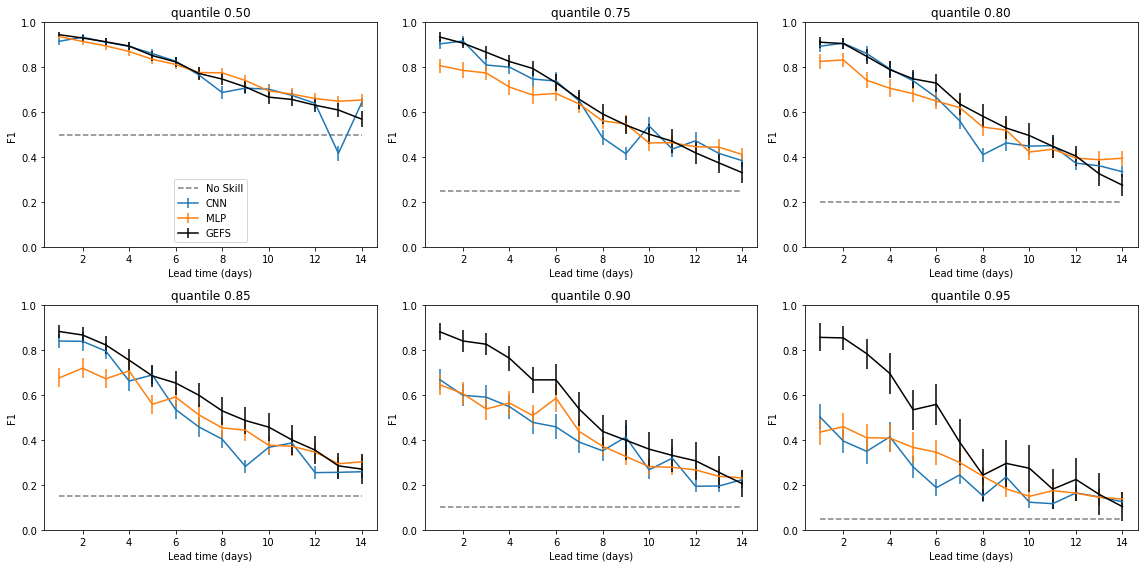

In [10]:
# NOTE THIS IS V8 LOCALLY GENERATED
plot_f1('precip_location_nonstd3.1')

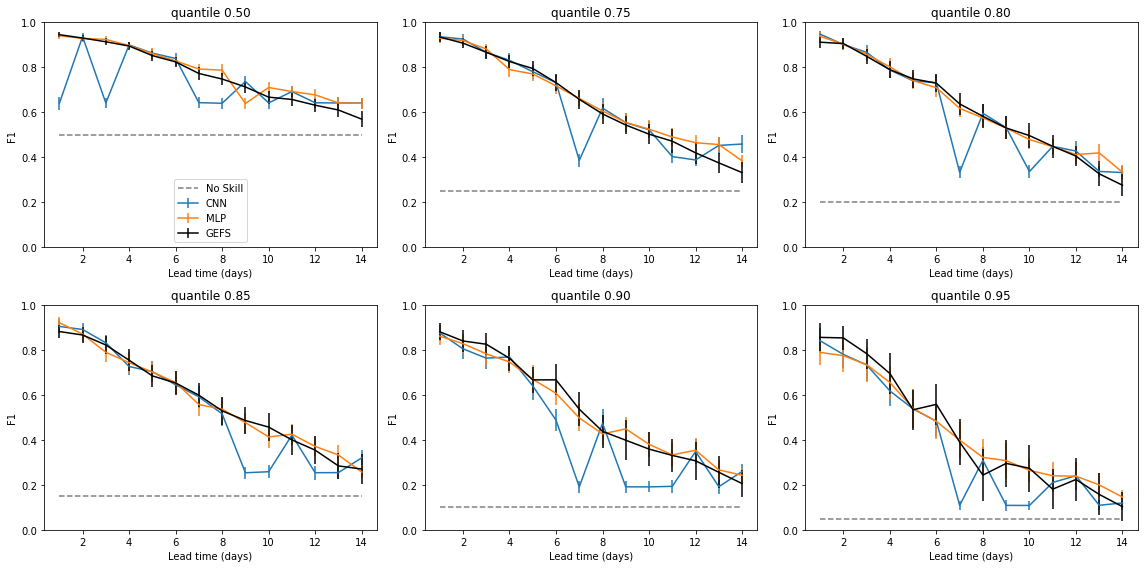

In [11]:
# NOTE THIS IS V9
create_f1('precip_location_nonstd4')
plot_f1('precip_location_nonstd4')

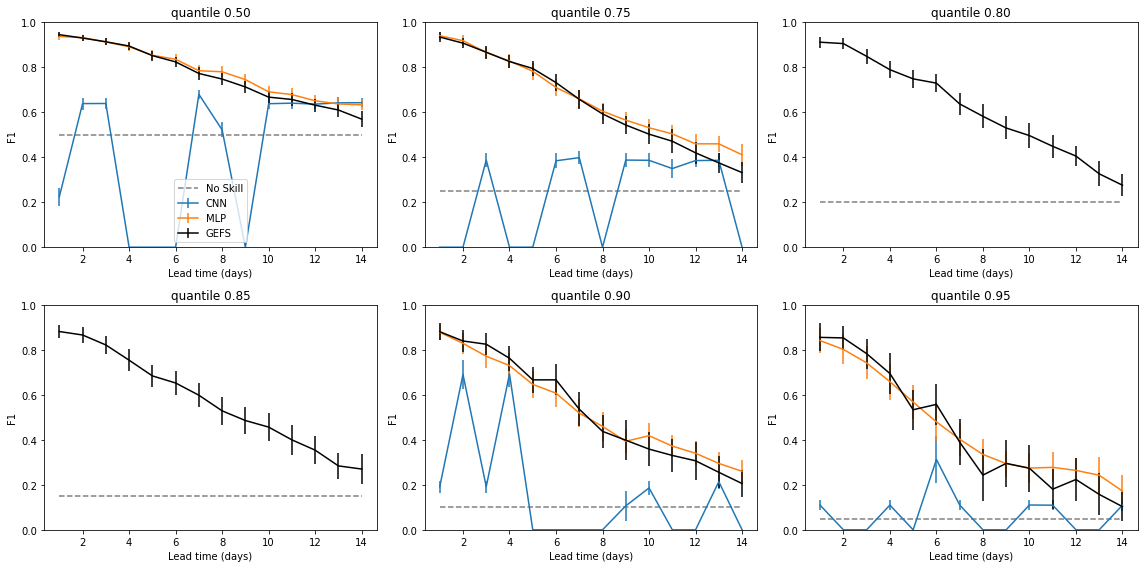

In [7]:
# NOTE individually replace v9 with newly trained mlp models....
create_f1('precip_location_v9')
plot_f1('precip_location_v9')

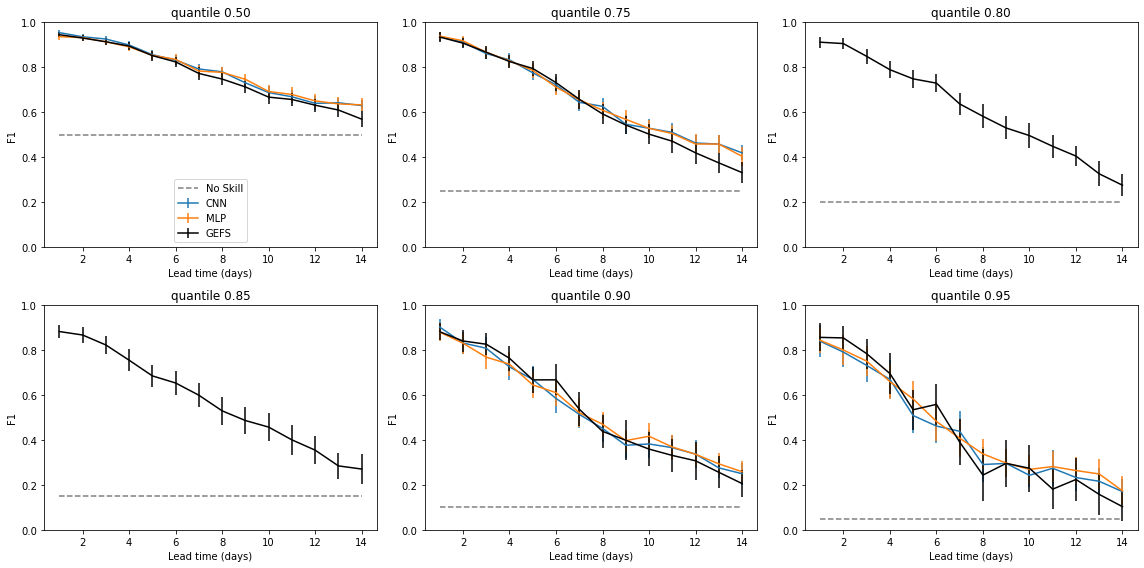

In [4]:
# NOTE completely replace v9 with newly trained mlp & cnn models....
create_f1('1d_precip_location_v9')
plot_f1('1d_precip_location_v9')

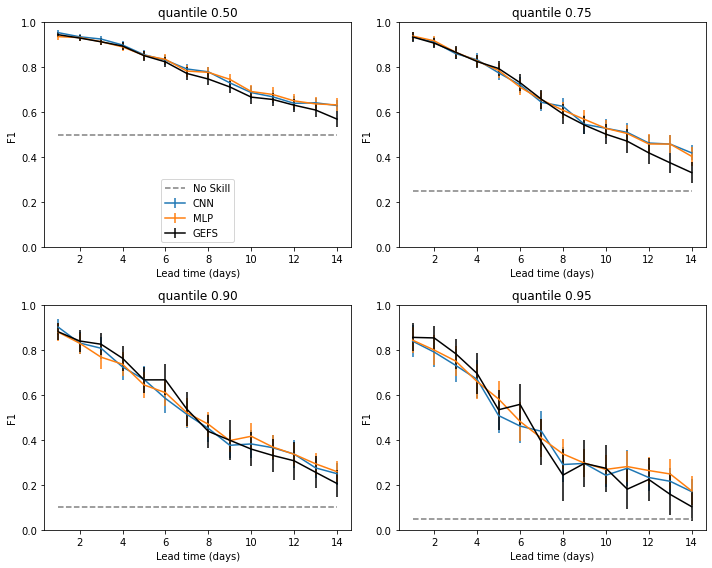

In [15]:
plt.rcParams['figure.figsize'] = [10, 8]
plot_f1('1d_precip_location_v9')

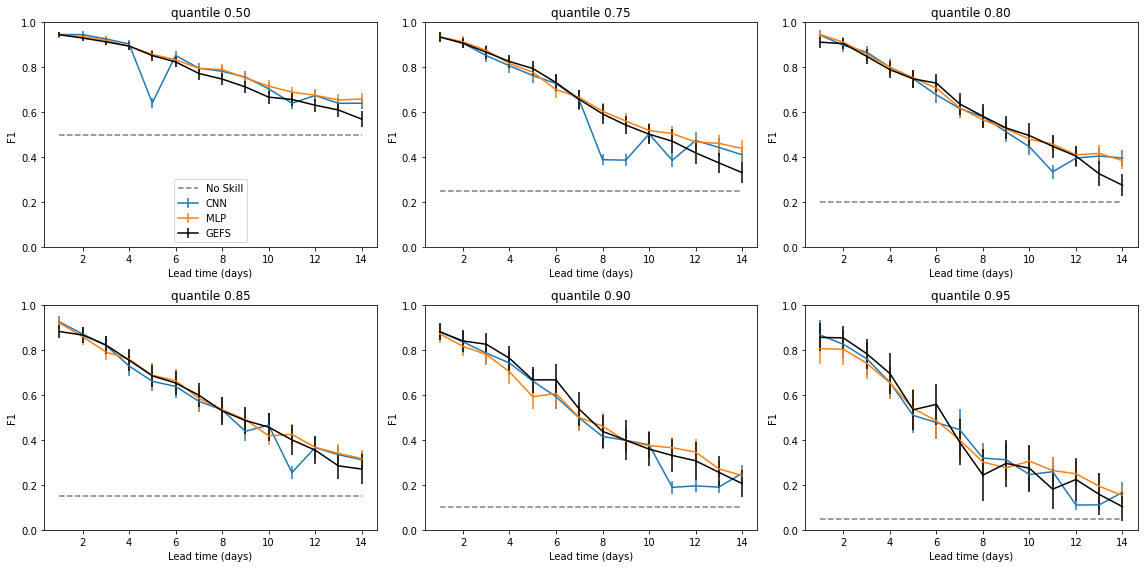

In [7]:
create_f1('precip_v10')
plot_f1('precip_v10')

### ROC

In [9]:
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import f1_score
import h5py
import numpy as np
import pandas as pd
import pickle
import sys
import matplotlib.pyplot as plt

In [31]:
key = 'location_std2'
rname = 'results/classifier_outcomes_precip_%s.csv' % key
outcomes = pd.read_csv(rname, index_col=0, parse_dates=True)
outcomes = outcomes[3932:]
outcomes.shape

(1361, 175)

In [40]:
roc_q = 0.90
roc_m = 'CNN'

In [41]:
def roc_curve_prep(roc_q, roc_m):
    fpr, tpr = dict(), dict()
    precision, recall = dict(), dict()
    auc_score, f1 = dict(), dict()
    for i in range(14):
        fpr['%d' %i], tpr['%d' %i], _ = roc_curve(outcomes['ERA5_%.2f' %roc_q], outcomes['%s_%d_%.2f' %(roc_m, i, roc_q)])
        precision['%d' %i], recall['%d' %i], _ = precision_recall_curve(outcomes['ERA5_%.2f' %roc_q], outcomes['%s_%d_%.2f' %(roc_m, i, roc_q)])
        auc_score['%d' %i] = np.round(auc(fpr['%d' %i], tpr['%d' %i]),4)
        f1['%d' %i] = np.round(f1_score(outcomes['ERA5_%.2f' %roc_q], (outcomes['%s_%d_%.2f' %(roc_m, i, roc_q)]> 0.5)),4)
    return fpr, tpr, precision, recall, auc_score, f1

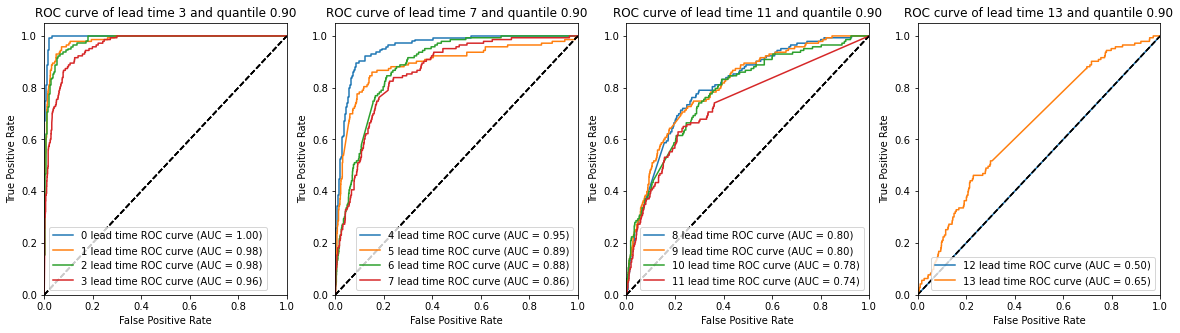

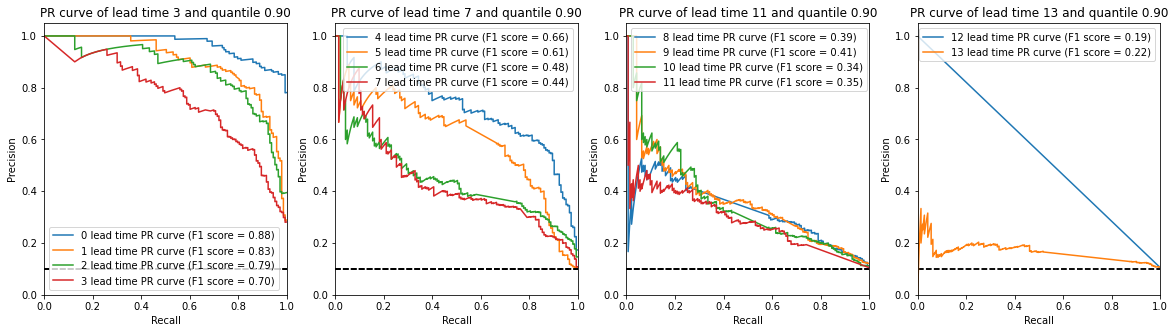

In [42]:
fpr, tpr, precision, recall, auc_score, f1 = roc_curve_prep(roc_q, roc_m)
roc_plot(roc_q)

In [43]:
# benchmark confusion matrix
rname = 'results/benchmark_confusion_matrix_apples.csv'
con_precip_bm = pd.read_csv(rname, index_col=0, parse_dates=True)

In [44]:
# ROC matrix for benchmark at a certain Quantile
BM_dot = []
leads = [d for d in range(14)]
for l in leads:
    TP = int(con_precip_bm[3932:].filter(regex='_%d_%0.2f_TP' %(l, roc_q)).sum(axis=0))
    TN = int(con_precip_bm[3932:].filter(regex='_%d_%0.2f_TN' %(l, roc_q)).sum(axis=0))
    FP = int(con_precip_bm[3932:].filter(regex='_%d_%0.2f_FP' %(l, roc_q)).sum(axis=0))
    FN = int(con_precip_bm[3932:].filter(regex='_%d_%0.2f_FN' %(l, roc_q)).sum(axis=0))
    TPR = TP/(TP+FN)     # TP rate = TP/TP+FN
    FPR = FP/(FP+TN)     # FP rate = FP/FP+TN
    BM_dot.append([FPR,TPR])

In [45]:
# create confusion matrix for outcome matrix at all quantiles
# create ROC matrix for outcome as well - points
outcomes_ana = outcomes.copy() # here outcomes is for test period
for col in outcomes_ana.columns[1:]:
    if outcomes_ana[col].dtypes == 'float64':
        outcomes_ana[col] = (outcomes_ana[col]> 0.5)

leads = [d for d in range(14)]
quantiles = [0.50, 0.75, 0.80, 0.85, 0.9, 0.95]
points = pd.DataFrame(index=leads)
con_outcomes_ana = pd.DataFrame(outcomes_ana['ERA5']) #'ERA5'
models=['CNN','MLP']
for m in models:
    for q in quantiles:
        points['%s_%0.2f_TPR' % (m, q)] = leads
        points['%s_%0.2f_FPR' % (m, q)] = leads
        for l in leads:
            label = outcomes_ana['ERA5_%0.2f' % q] #'ERA5'
            pred =  outcomes_ana['%s_%d_%0.2f' % (m, l, q)]
            TP = (label&pred)
            con_outcomes_ana['%s_%d_%0.2f_TP' % (m, l, q)] = TP
            TN = (~label&~pred)
            con_outcomes_ana['%s_%d_%0.2f_TN' % (m, l, q)] = TN
            FP = (~label&pred)
            con_outcomes_ana['%s_%d_%0.2f_FP' % (m, l, q)] = FP
            FN = (label&~pred)
            con_outcomes_ana['%s_%d_%0.2f_FN' % (m, l, q)] = FN
            # TP rate = TP/TP+FN
            TPR = np.sum(TP)/(np.sum(TP)+np.sum(FN))
            # FP rate = FP/FP+TN
            FPR = np.sum(FP)/(np.sum(FP)+np.sum(TN))
            points.loc[l,'%s_%0.2f_TPR' % (m, q)] = TPR
            points.loc[l,'%s_%0.2f_FPR' % (m, q)] = FPR

In [8]:
# this was test period results
lts = [0,5,10,13]

plt.rcParams['figure.figsize'] = [6, 6]

colors=['C0','C1','C2','C3', 'C4']
for i,l in enumerate(lts):
    plt.plot(fpr['%d' %l], tpr['%d' %l], color=colors[i], label='%d lead time (AUC = %0.2f)' %(l, auc_score['%d' %l]))
    plt.plot(points.loc[l,'%s_%0.2f_FPR' % (roc_m, roc_q)], points.loc[l,'%s_%0.2f_TPR' % (roc_m, roc_q)], "*", markersize=10, color=colors[i], label='%s' %m)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(BM_dot[l][0],BM_dot[l][1], "x", markersize=10, color=colors[i], label='GEFS')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve of quantile %0.2f' % roc_q)
    plt.legend(loc="best")
plt.show()

NameError: name 'fpr' is not defined

### Function

In [2]:
# f1 scores 

import numpy as np 
import pandas as pd
import pickle
from sklearn.metrics import f1_score
import os

def create_f1(key, th=0.5):

    path = 'data/'
    models = ['CNN', 'MLP']
    leads = [d for d in range(14)]
    quantiles = [0.50, 0.75,  0.9, 0.95]# 0.80, 0.85, 0.9, 0.95]
    threshold = th

    results = {}
    rname = 'results/classifier_outcomes_%s.csv' % key
    outcomes = pd.read_csv(rname, index_col=0, parse_dates=True)


    for q in quantiles:
        results[q] = {}
        try:
            y = outcomes['ERA5_%0.2f' % q]
            y_test = y[3932:] # test only
        except:
            continue

        for m in models:
            f1model = []
            f1modelerr = []
            no_skill = []

            for l in leads:
                col = '%s_%d_%0.2f' % (m, l, q)
                y_pred = outcomes[col]
                y_pred = y_pred[3932:] # test only
                no_skill.append(y_test.sum() / y_test.size)

                # bootstrap
                nboot = 200
                temp = np.zeros(nboot)
                N = y_test.size

                for i in range(nboot):
                    r = np.random.randint(N, size=N)
                    temp[i] = f1_score(y_test[r], (y_pred[r] > threshold))

                f1model.append(np.mean(temp))
                f1modelerr.append(1.96 * np.std(temp, ddof=1)) 
                # how was the error calculated??

            results[q][m] = (f1model, f1modelerr)

    pickle.dump(results, open('results/f1scores_%s.pkl' % (key), 'wb'))  

In [3]:
import matplotlib.pyplot as plt

def plot_f1(key):
    gefs_benchmark = pickle.load(open('results/gefs_benchmark_uniq.pkl', 'rb'))
    corrected_gefs_benchmark = pickle.load(open('results/gefs_benchmark_precip_apples.pkl', 'rb'))# then plot
    results = pickle.load(open('results/f1scores_%s.pkl' % key, 'rb'))

#    plt.rcParams['figure.figsize'] = [16, 8]
    quantiles = [0.50, 0.75, 0.9, 0.95] #0.80, 0.85, 0.9, 0.95]
    models = ['CNN', 'MLP']
    leads = [d for d in range(14)]

    for i,q in enumerate(quantiles):
        plt.subplot(2,2,i+1)
        plt.subplot(2,3,i+1)
        plt.title('quantile %0.2f' % q)
      no_skill = np.array([(1-q) for d in leads])

      for m in models:
        try:
            f1model, f1modelerr = results[q][m]

            plt.errorbar(x = np.array(leads)+1,
                         y = np.array(f1model),
                         yerr = np.array(f1modelerr))
        except:
            continue

      plt.errorbar(x = np.array(leads)+1,
                   y = np.array(gefs_benchmark[q]['f1']), 
                   yerr = np.array(gefs_benchmark[q]['f1_ci']),
                   color='k')  
      plt.plot(np.array(leads)+1, np.array(no_skill), '--', color='0.5')

   plt.errorbar(x = np.array(leads)+1,
           y = np.array(gefs_benchmark[q]['f1']), 
           yerr = np.array(gefs_benchmark[q]['f1_ci']),
           color='k')    
      plt.xlabel('Lead time (days)')
      plt.ylabel('F1')
      plt.ylim([0,1])

      if i==0:
        plt.legend(['No Skill', 'CNN', 'MLP', 'GEFS'], loc='lower center')

    plt.tight_layout()
    plt.show()

In [4]:
def roc_plot(roc_q):
    # this was test period results

    import warnings
    warnings.filterwarnings('ignore')

    plt.rcParams['figure.figsize'] = [20, 5]

    for i in range(14):
        plt.subplot(1,4,i//4+1)
        plt.plot(fpr['%d' %i], tpr['%d' %i], label='%d lead time ROC curve (AUC = %0.2f)' %(i, auc_score['%d' %i]))
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC curve of lead time %d and quantile %0.2f' %(i, roc_q))
        plt.legend(loc="best")
    plt.show()

    for i in range(14):
        plt.subplot(1,4,i//4+1)
        no_skill = 0.1
        plt.plot([0, 1], [no_skill, no_skill], 'k--')
        plt.plot(recall['%d' %i], precision['%d' %i], label='%d lead time PR curve (F1 score = %0.2f)' % (i, f1['%d' %i]))
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('PR curve of lead time %d and quantile %0.2f' %(i, roc_q))
        plt.legend(loc="best")
    plt.show()

In [5]:
import numpy as np 
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.patches as mpatches
import cartopy
import cartopy.crs as ccrs
import datetime as dt

geo = ccrs.PlateCarree() # This line does not work within the function

def map_format(ax):
    # ax.add_feature(cartopy.feature.LAND, color='0.2')
    # ax.add_feature(cartopy.feature.OCEAN, color='steelblue')
    ax.add_feature(cartopy.feature.BORDERS, linestyle='-')
    ax.add_feature(cartopy.feature.COASTLINE, linestyle='-')
    ax.add_feature(cartopy.feature.STATES, linestyle='-')
    ax.set_extent([-141,-97,14,62], crs=geo)

    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                    linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xlabels_bottom = False
    gl.ylabels_left = False
    # gl.xformatter = LONGITUDE_FORMATTER
    # gl.yformatter = LATITUDE_FORMATTER
    ax.add_patch(mpatches.Rectangle(xy=[-123, 38], width=3, height=4,
                                    edgecolor='r',
                                    facecolor='none',
                                    linewidth=1,
                                    transform=ccrs.PlateCarree()))
    return ax